In [1]:
import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset, DataLoader
print(torch.__version__)

2.6.0+cu124


# Using a sequential method to build a NN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [3]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x).float().to(device)
    self.y = torch.tensor(y).float().to(device)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)

In [4]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [5]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [6]:
!pip install torch_summary
from torchsummary import summary

summary(model, torch.zeros(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [7]:
loss_func = nn.MSELoss()

In [8]:
from torch.optim import SGD

opt = SGD(model.parameters(), lr=0.001)

In [9]:
import time

loss_history = []
start = time.time()

for _ in range(50):
  for ix, iy in dl:
    opt.zero_grad()
    loss_value = loss_func(model(ix), iy)
    loss_value.backward()
    opt.step()

    loss_history.append(loss_value.item())

end = time.time()
print(end - start)

0.3993673324584961


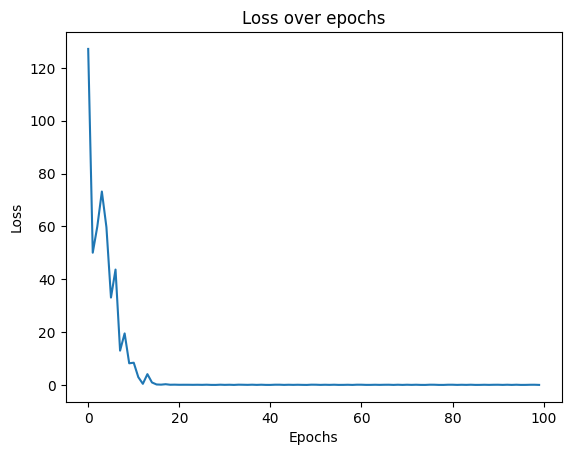

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_history)

In [11]:
val = [[8,9], [10,11], [1.5, 2.5]]

model(torch.tensor(val).float().to(device))

tensor([[16.7494],
        [20.5789],
        [ 4.3102]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Saving and loading a model

In [12]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3961, -0.4334],
                      [ 0.2961, -0.4506],
                      [ 0.5756, -0.6709],
                      [-0.6716,  0.0285],
                      [ 0.0420, -0.1385],
                      [ 0.3929,  0.2230],
                      [ 0.9517,  0.5418],
                      [-0.4193,  1.0151]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3493, -0.5220,  0.3486, -0.3847,  0.3775,  0.5519,  0.2668, -0.3597],
                     device='cuda:0')),
             ('2.weight',
              tensor([[-0.2567,  0.3531, -0.0245,  0.2724,  0.0721,  0.3710,  0.9168,  0.5323]],
                     device='cuda:0')),
             ('2.bias', tensor([0.0536], device='cuda:0'))])

## Saving

In [13]:
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')

## Loading

In [15]:
# initialize the model with random weights
# load the weights from state_dict

model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [16]:
state_dict = torch.load('mymodel.pth')

In [17]:
model.load_state_dict(state_dict)
model.to(device)

model(torch.tensor(val).float().to(device))

tensor([[16.7494],
        [20.5789],
        [ 4.3102]], device='cuda:0', grad_fn=<AddmmBackward0>)